# Decision Tree

## Bibliotecas

In [1]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

# Classes do modelo de aprendizado
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---

## Importação dos dados

In [2]:
# Carregando o dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")

# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

---

## Inspeção e treinamento dos dados

### Classificação

In [3]:
# Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[0,1]]
y = dataset.iloc[:,[4]]

# Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
model = DecisionTreeClassifier()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.50      0.47      0.48        15
           2       0.36      0.36      0.36        11

    accuracy                           0.61        38
   macro avg       0.60      0.61      0.60        38
weighted avg       0.59      0.61      0.60        38



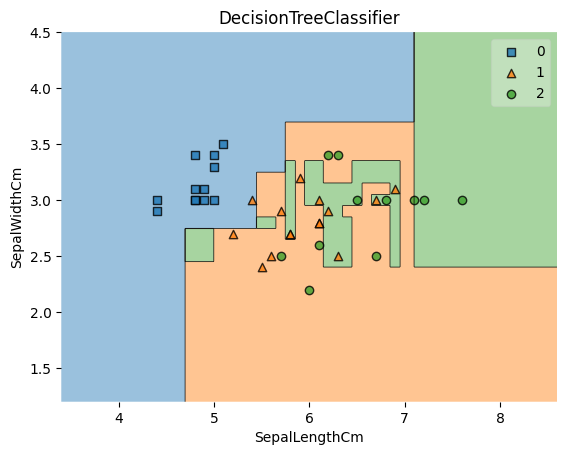

In [5]:
def show_decision_region(x, y, clf):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")

    plt.title(clf.__class__.__name__)
    plt.show()

show_decision_region(np.array([X_test["SepalLengthCm"].values, X_test["SepalWidthCm"].values]).T, y_test.values.reshape(-1,1).T[0], model)
     

In [6]:
plt.figure(figsize=(100,100))
plot_tree(model, feature_names=["SepalLengthCm", "SepalWidthCm"], class_names=['setosa', 'versicolor', 'virginica']);

In [7]:
# com as 4 features
# Vamos usar todas as features
X = dataset.iloc[:,0:4]
y = dataset.iloc[:,-1]
# y = dataset.loc[:,["Species"]]

# Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
model = DecisionTreeClassifier()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



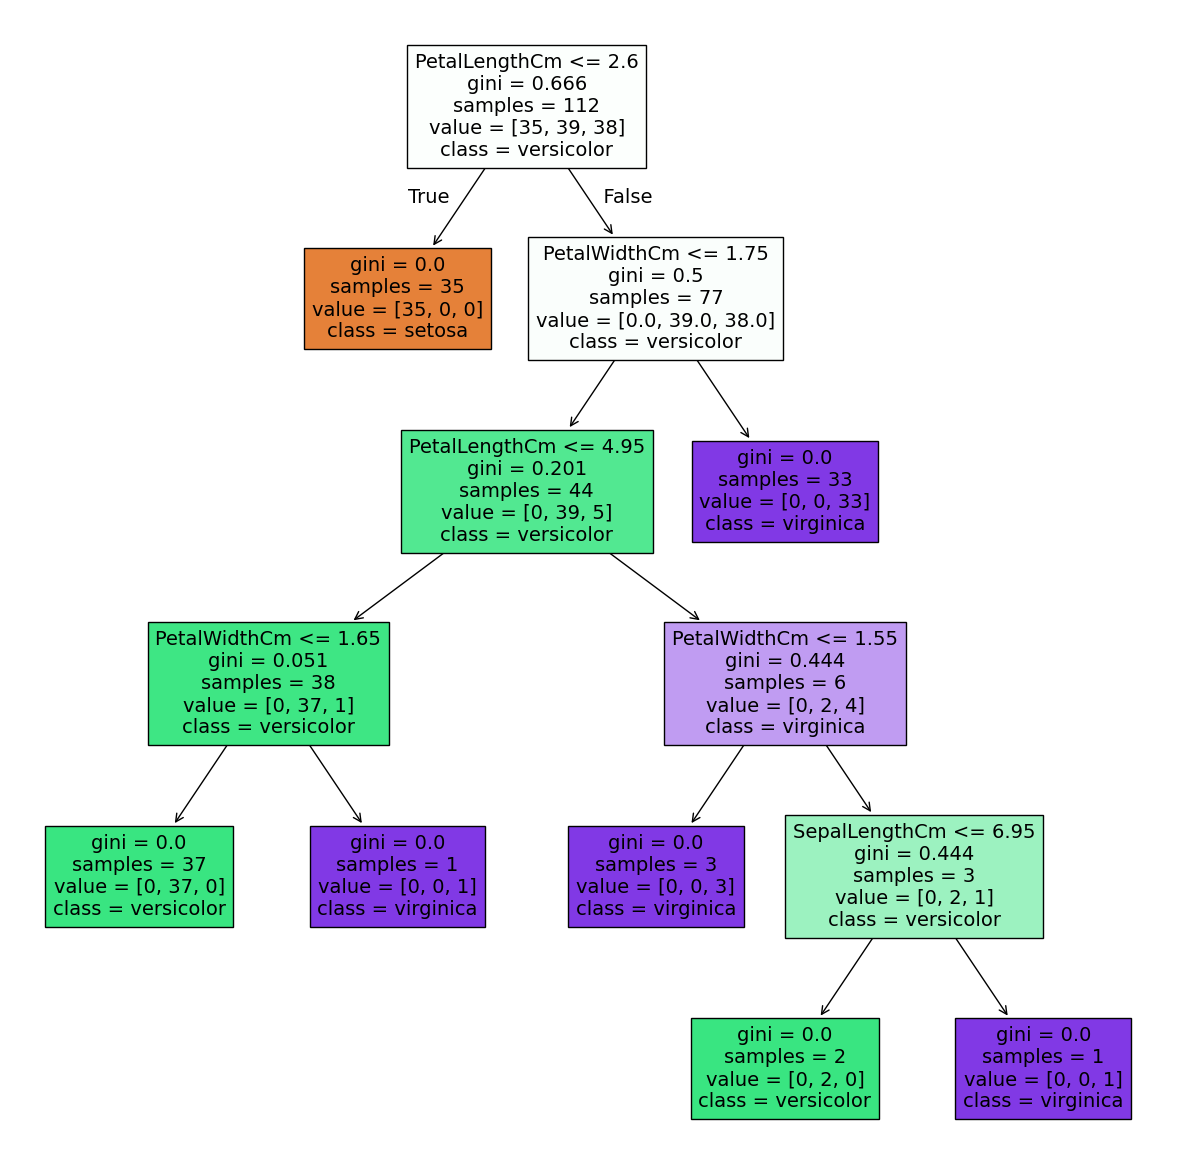

In [9]:
plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], 
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

**Criterion** é a função para medir a qualidade de uma divisão. Por padrão o critério usado é o coeficiente gini [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

- coeficiente gini: Mede a probabilidade de uma variável específica ser classificada erroneamente quando escolhida aleatoriamente. $gini(p) = 1-\sum_{i=1}^n (p_i)^2$

- entropia: Entropia é o grau de incerteza, impureza ou desordem de uma variável aleatória ou uma medida de pureza.  

In [10]:
for i, criterion in enumerate(['gini', 'entropy']):
    print(criterion.upper()+ "\n")
    model = DecisionTreeClassifier(criterion=criterion, max_depth=4)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    #predição
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
plt.show()

GINI

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

ENTROPY

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



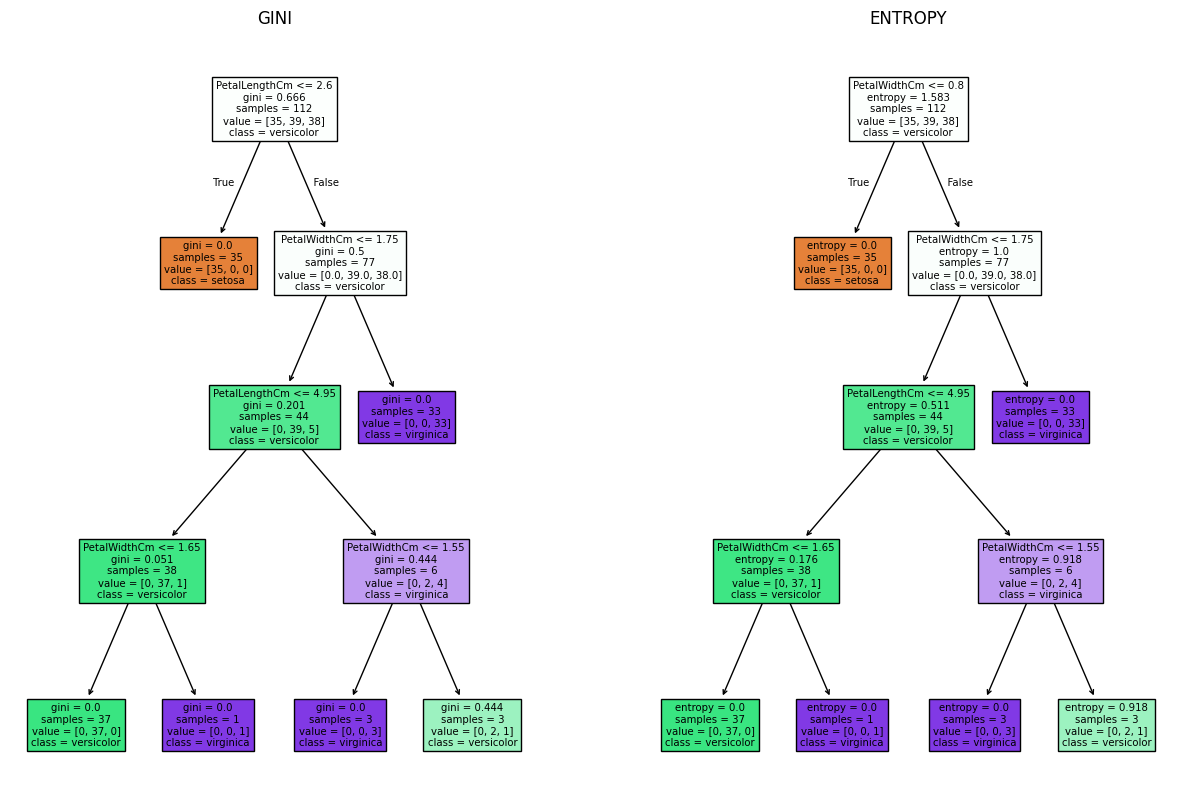

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

for i, criterion in enumerate(['gini', 'entropy']):
    model = DecisionTreeClassifier(criterion=criterion, max_depth=4)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    tree = plot_tree(model, ax=ax[i],feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
    ax[i].set_title(criterion.upper())
plt.show()

**max_depth** determina a profundidade máxima da árvore

In [12]:
for i, max_depth in enumerate([2,3,4]):
    print(f"MAX_DEPTH - {max_depth} \n ")
    model = DecisionTreeClassifier(max_depth=max_depth)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    #predição
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
plt.show()

MAX_DEPTH - 2 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

MAX_DEPTH - 3 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

MAX_DEPTH - 4 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.82      0.90        11
           2       0.86 

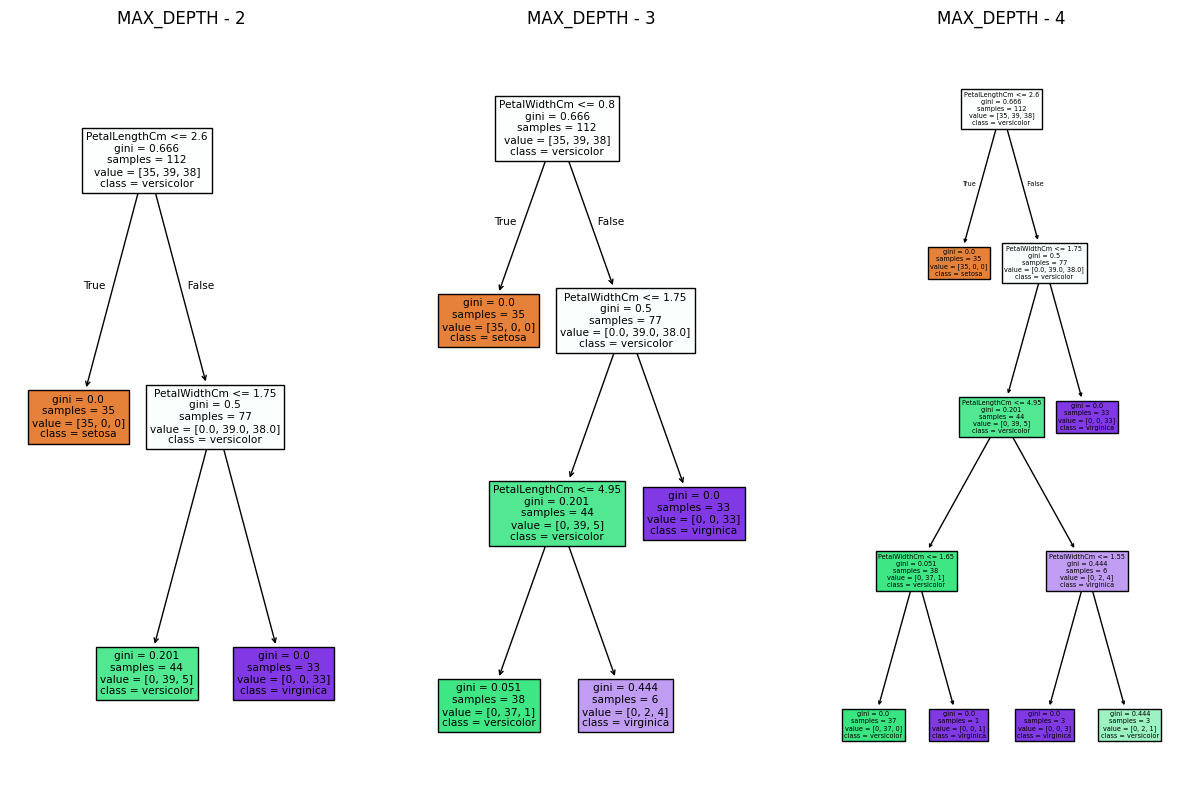

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,10))

for i, max_depth in enumerate([2,3,4]):
    model = DecisionTreeClassifier(max_depth=max_depth)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    tree = plot_tree(model, ax=ax[i],feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
    ax[i].set_title(f"MAX_DEPTH - {max_depth}")
    
plt.show()

---

### Regressão

In [14]:
dataset_R = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/house.csv")


dataset_R.head()

In [15]:
X = dataset_R.iloc[:,1:-1] 
y = dataset_R.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
regression_tree = DecisionTreeRegressor(max_depth=3)
regression_tree.fit(X_train, y_train)

y_pred = regression_tree.predict(X_test)

#Coeficiente de determinação - melhor valor é 1
print("R2_score:", r2_score(y_test, y_pred))

R2_score: 0.2988322195592851


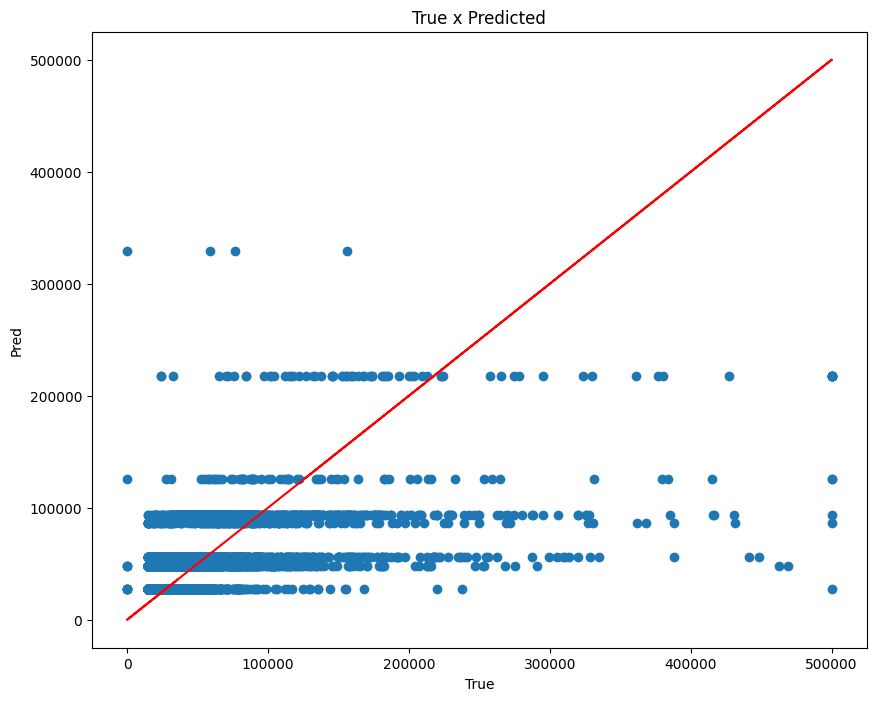

In [17]:
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.scatter(y_test, y_pred)
ax.plot(y_test, y_test, color='red')

ax.set_xlabel('True')
ax.set_ylabel('Pred')
plt.title("True x Predicted")

plt.show()

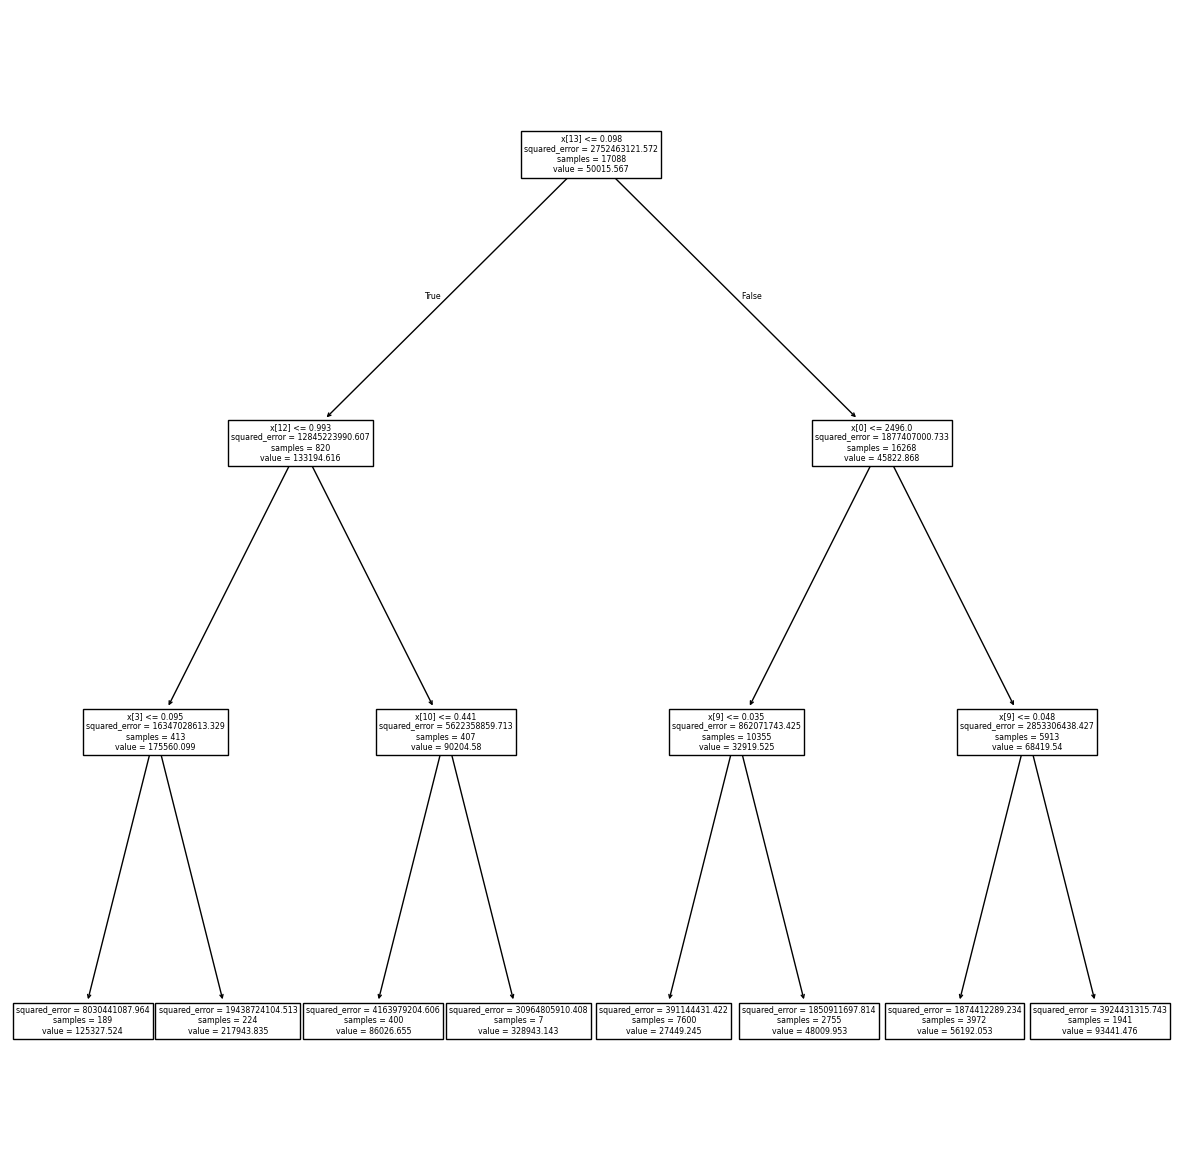

In [18]:
plt.figure(figsize=(15,15))
_ = plot_tree(regression_tree)